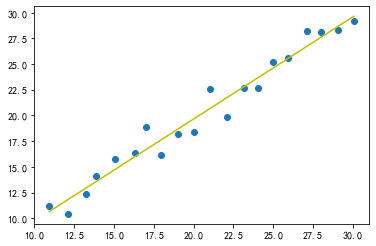

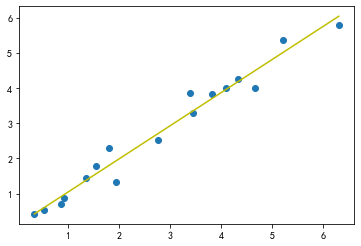

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def data(path):
    df = pd.DataFrame(pd.read_excel(path))
    x = np.array(df['x']);y=np.array(df['y'])
    return x,y
# 向量化X
def initX(x):
    one = np.ones((x.shape[0],1))
    X = np.c_[x,one]
    return X
# 最小二乘法计算参数向量
def Least_squares(X,y):
    temp1 = np.array(np.matrix(np.dot(X.T,X)).I)
    temp2 = np.dot(temp1,X.T,)
    Beta = np.dot(temp2,y)
    return Beta

# 定义数据集
path = r"linearRegression Data.xlsx"
x,y = data(path=path)
x1 = np.array([10.95,12.14,13.22,13.87,15.06,16.30,17.01,17.93,19.01,20.01,
               21.04,22.10,23.17,24.07,25.00,25.95,27.10,28.01,29.06,30.05])
y1 = np.array([11.18,10.43,12.36,14.15,15.73,16.40,18.86,16.13,18.21,18.37,
               22.61,19.83,22.67,22.70,25.16,25.55,28.21,28.12,28.32,29.18])
x_x = initX(x);x1_x = initX(x1)
Beta = Least_squares(X=x_x,y=y)
Beta1 = Least_squares(X=x1_x,y=y1)
y_1 = Beta[0]*x+Beta[1]
y1_1 = Beta1[0]*x1+Beta1[1]
plt.rcParams["font.sans-serif"]=['SimHei']
plt.rcParams["axes.unicode_minus"]=False
plt.figure()
plt.scatter(x1,y1),plt.plot(x1,y1_1,c="y")
plt.show
plt.figure()
plt.scatter(x,y);plt.plot(x,y_1,c="y")
plt.show()